In [1]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

### Carregando dataset de validação

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore

IMG_HEIGHT = 150
IMG_WIDTH = 150

BATCH_SIZE = 32

VALIDATION_DIR = '../processed_data/dataset_1_split/validation'


validation_datagen = ImageDataGenerator(
    rescale=1./255
)


validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False              
)

class_names = list(validation_generator.class_indices.keys())

Found 411 images belonging to 16 classes.


### Carregando modelos desejados

In [8]:
model_base = tf.keras.models.load_model('modelo_base.h5')
model_otimizado = tf.keras.models.load_model('modelo_otimizado.h5') # Use o nome do seu melhor modelo

### Rodando a validação dos modelos

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random


validation_generator.reset() # Garante que o gerador comece do início

# Pega os nomes das classes
class_names = list(validation_generator.class_indices.keys())

# --- LÓGICA PARA ENCONTRAR MELHORIAS ---

# Faz previsões com os dois modelos
pred_base = model_base.predict(validation_generator)
pred_otimizado = model_otimizado.predict(validation_generator)

# Converte probabilidades para a classe prevista (índice)
y_pred_base = np.argmax(pred_base, axis=1)
y_pred_otimizado = np.argmax(pred_otimizado, axis=1)

# Pega as classes verdadeiras
y_true = validation_generator.classes

# Encontra os índices das imagens que foram corrigidas
indices_corrigidos = []
for i in range(len(y_true)):
    if y_pred_base[i] != y_true[i] and y_pred_otimizado[i] == y_true[i]:
        indices_corrigidos.append(i)

print(f"Encontrado(s) {len(indices_corrigidos)} exemplo(s) de imagens que o modelo otimizado corrigiu!")

13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 666ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 860ms/step
Encontrado(s) 199 exemplo(s) de imagens que o modelo otimizado corrigiu!


### Visualização dos resultados

Obs: Rode esse trecho de código quantas vezes achar necessário!

A lógica implementada retorna 3 exemplos aleatórios

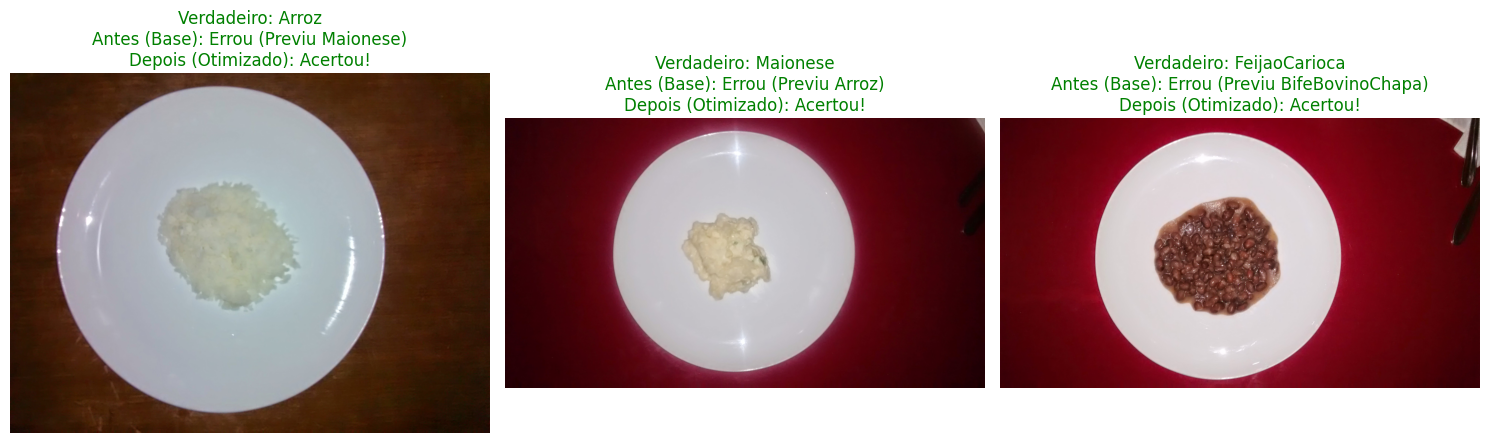

In [13]:

# Mostra alguns exemplos aleatórios de imagens corrigidas
if indices_corrigidos:
    plt.figure(figsize=(15, 5 * min(3, len(indices_corrigidos)))) # Mostra no máximo 3 exemplos
    
    # Pega até 3 exemplos aleatórios da lista de corrigidos
    exemplos_a_mostrar = random.sample(indices_corrigidos, k=min(3, len(indices_corrigidos)))

    for i, idx in enumerate(exemplos_a_mostrar):
        plt.subplot(1, 3, i + 1)
        
        # Carrega e exibe a imagem original
        img = tf.keras.utils.load_img(validation_generator.filepaths[idx])
        plt.imshow(img)
        plt.axis('off')

        # Cria o título da imagem
        true_label = class_names[y_true[idx]]
        base_pred_label = class_names[y_pred_base[idx]]
        
        title = f"Verdadeiro: {true_label}\n" \
                f"Antes (Base): Errou (Previu {base_pred_label})\n" \
                f"Depois (Otimizado): Acertou!"
        plt.title(title, color='green')
        
    plt.tight_layout()
    plt.show()
else:
    print("Nenhum exemplo encontrado para esta execução. Tente treinar novamente ou seu modelo base já era muito bom!")